<a href="https://colab.research.google.com/github/sugatoray/matplotlib_contrib/blob/master/examples/Applying_Fancy_Formatting_on_Axis_Labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import re

**AUTHOR**: SUGATO RAY  

Social Profiles: 
+ `github`: [sugatoray]( https://github.com/sugatoray)
+ `tweeter`: [@sugatoray](https://twitter.com/sugatoray)
+ `LinkedIn`: [sugatoray](http://www.linkedin.com/in/sugatoray/)
+ `Stackoverflow`: [cypherx](https://stackoverflow.com/story/sugatoray)

# **Clone the Repository**

**repo**: https://github.com/sugatoray/matplotlib_contrib.git

In [2]:
#@title Execute `git clone remote-repo` { vertical-output: true }
git_clone_repo = True #@param ["True", "False"] {type:"raw"}
REPO = "https://github.com/sugatoray/matplotlib_contrib.git"
REPO_NAME = [part for part in str(REPO).strip().split('/') if part.endswith('.git')][0].split('.git')[0]
#repo_name = repo.split().split('/')[-1]
print('REPO: {}'.format(REPO))
print('REPO_NAME: {}'.format(REPO_NAME))
if os.path.exists(os.path.abspath('./matplotlib_contrib')):
    if git_clone_repo:
        !rm -r $REPO_NAME
        !git clone $REPO

REPO: https://github.com/sugatoray/matplotlib_contrib.git
REPO_NAME: matplotlib_contrib
Cloning into 'matplotlib_contrib'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 25 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


# Import `fancy_formatting` module

And show docstring for method **`fancy_format_axis_labels()`**. 
```python
from matplotlib_contrib.axes.axes_labels import fancy_formatting as ff
print(ff.fancy_format_axis_labels.__doc__)
```

In [0]:
from matplotlib_contrib.axes.axes_labels import fancy_formatting as ff

## Show Docstring of `fancy_format_axis_labels()`.

In [4]:
print(ff.fancy_format_axis_labels.__doc__)

Formats axis label according to label range format specification(s).

    This method fetches the current label-values for x or y axis of the 
    axis-object (ax), formats the labels according to the format specification 
    (label_range_spec) for ranges of values of the label; and finaly, 
    updates the axis-label in the axis-object.


    Parameters
    ----------
    ax: axis-object. (matplotlib.pyplot.gca() is default)
    which_axis: 'x', 'y'. ('y' is default)
    label_range_spec: list. (None is default)
        See format_labels() for more details. If None is used the following is 
        used instead.
    >>> abel_range_spec = [{'min': -np.inf, 'max': np.inf, 'format': ':.1f'}, ]


    Refernces
    ---------
    Relevant Stackoverflow thread: 
        https://stackoverflow.com/questions/11244514/modify-tick-label-text


    Example
    -------

    >>> import numpy as np
    >>> import matplotlib.pyplot as plt
    >>> # Comment out the following three lines 
    >>> #    

## Show Example of **fancy-formatting** the axis-labels in a figure.

We will use the following formatting specifications for y-axis label. We have divided the range $(-\infty, +\infty)$ into four sub-regions as follows:  

| Sub-Region |     Min     |     Max     | Format | Example |
|:----------:|:-----------:|:-----------:|:------:|:--------|
|      1     |  $-\infty$  |    2.000    | ':.0f' | -1.0 $\rightarrow$  -1 |
|      2     |     2.001   |    5.000    | ':.1f' | 4.01 $\rightarrow$  4.0 |
|      3     |     5.001   |   11.000    | ':.2f' | 10.2 $\rightarrow$  10.20  |
|      4     |    11.001   |  $+\infty$  | ':.3e' |  12 $\rightarrow$  1.200e+1 |

Any label-value less than $2.000$ should be formatted with no digits after the decimal. For example, $-1.0$ will be shown as $-1$.

```python
# Make fancy-formatting specifications
label_range_spec = [{'min': -np.inf, 'max': 2.000, 'format': ':.0f'}, 
                    {'min': 2.001, 'max': 5.000, 'format': ':.1f'}, 
                    {'min': 5.001, 'max': 11.000, 'format': ':.2f'}, 
                    {'min': 11.001, 'max': np.inf, 'format': ':.3e'}, 
                    ]
```

Make a figure and apply the _fancy-label-formatting_.

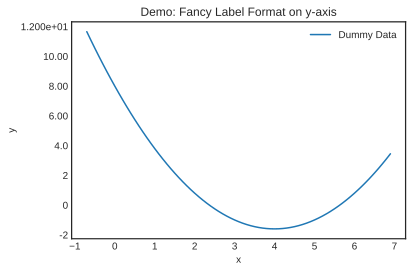

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 'svg', 'retina'
plt.style.use('seaborn-white')

# Make data
x = np.arange(-0.7, 7, 0.1)
y = 0.6*(x**2 - 8*x + 10)

# Make figure
fig, ax = plt.subplots()
# Draw canvas and initiate labels on the figure
fig.canvas.draw()
ax.plot(x,y, label='Dummy Data')

which_axis ='y' # specify which axis to apply fancy-formatting
# Make fancy-formatting specifications
label_range_spec = [{'min': -np.inf, 'max': 2.000, 'format': ':.0f'}, 
                    {'min': 2.001, 'max': 5.000, 'format': ':.1f'}, 
                    {'min': 5.001, 'max': 11.000, 'format': ':.2f'}, 
                    {'min': 11.001, 'max': np.inf, 'format': ':.3e'}, 
                    ]
# Apply fancy-formatting to axis-labels                    
ff.fancy_format_axis_labels(ax = ax, 
                            which_axis = which_axis, 
                            label_range_spec = label_range_spec)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Demo: Fancy Label Format on {}-axis'.format(which_axis))
plt.legend()
plt.show()